# HUMANOO Case Study: Report  *Masoud Azizimotlagh*

## Import libraries

In [55]:
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches

## Make connection to the database

In [12]:
db_path = '.\humanoo_dbt\dev.duckdb'
conn = duckdb.connect(database=db_path)

# Visualization of Models

### Question 1: Show the daily average number of steps for all the users, accross all days An example of the expected outcome: 10.000


In [74]:
df_average_daily = conn.sql('select * from main.daily_avg_steps').df() # fetch data and convert to dataframe from db
df_average_daily.head()

,activity_date,avg_steps
0,2023-11-15,10006.575758
1,2023-11-20,9439.760000
2,2023-11-03,9455.063830
3,2023-11-05,7140.030928
4,2023-11-21,8850.574257


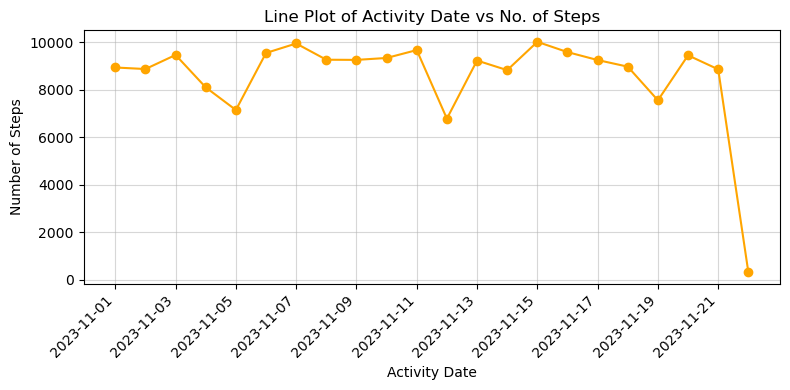

In [73]:
df_average_daily['activity_date'] = pd.to_datetime(df_average_daily['activity_date']) # use proper date format 
df_average_daily = df_average_daily.sort_values(by=['activity_date']) # sort values by date 
plt.figure(figsize=(8, 4)) # define figure size
plt.plot(df_average_daily['activity_date'], df_average_daily['avg_steps'],  color='orange', linestyle='-',marker='o') 
plt.xlabel('Activity Date')
plt.ylabel('Number of Steps')
plt.title('Line Plot of Activity Date vs No. of Steps')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d')) 
plt.xticks(rotation=45, ha='right') # rotate the x labels
plt.xticks(df_average_daily['activity_date'][::2])  # Show every second tick for better visibility
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()
plt.show()

Future Work: Holidays can also be added for better interpreting the plot

### Question 2: Show per "Company Name" amount of users and calculate % of how many users have steps data


In [75]:
df_percent_have_steps_data = conn.sql('select * from main.company_user_stats').df()

In [76]:
df_percent_have_steps_data

,company_name,users_with_steps,total_users,percentage_users_with_steps
0,Die Zweite GmbH,46,46,100.0
1,Some Company Inc.,34,34,100.0
2,The First Company Ltd.,42,42,100.0


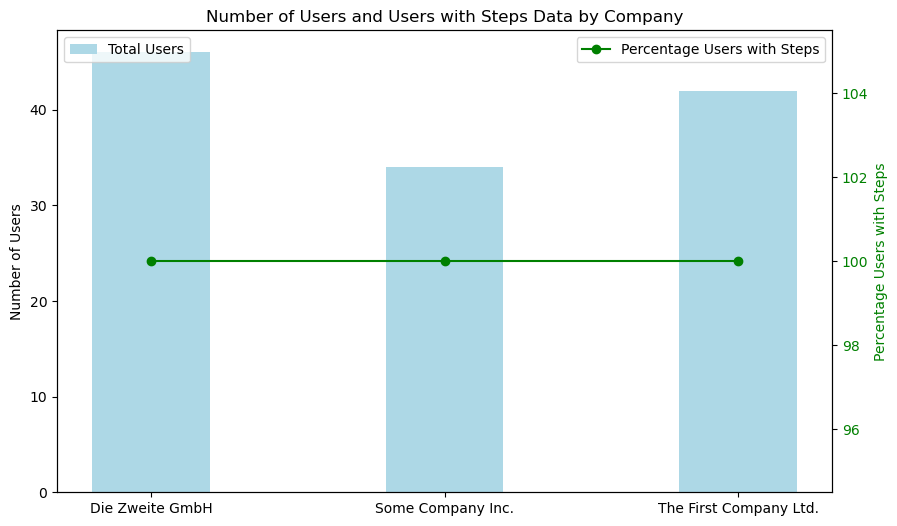

In [77]:
# Set the size of the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting bar charts for number of users
bar_width = 0.4
bar1 = ax1.bar(df_percent_have_steps_data['company_name'], df_percent_have_steps_data['total_users'], width=bar_width, label='Total Users', color='lightblue')

# Set the y-axis label
ax1.set_ylabel('Number of Users')

# Create a secondary y-axis for the percentage
ax2 = ax1.twinx()
line = ax2.plot(df_percent_have_steps_data['company_name'], df_percent_have_steps_data['percentage_users_with_steps'], marker='o', color='green', label='Percentage Users with Steps')

# Set the y-axis label for the percentage
ax2.set_ylabel('Percentage Users with Steps', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set plot title
plt.title('Number of Users and Users with Steps Data by Company')

# Show the plot
plt.show()

Seems the data is not correct or very luckily round and perfect. Its more probable that I might mess up my calculations in the dbt model :((

### Question 3: Show the top 10 and bottom 10 users with the most (and least) steps collect in any day Output should be for both top & bottom: "User Name" and "Number of Steps"


In [84]:
df_top_bottom = conn.sql('select * from main.top_bottom_users').df()
df_top_bottom = df_top_bottom.sort_values(by='total_steps', ascending=False)

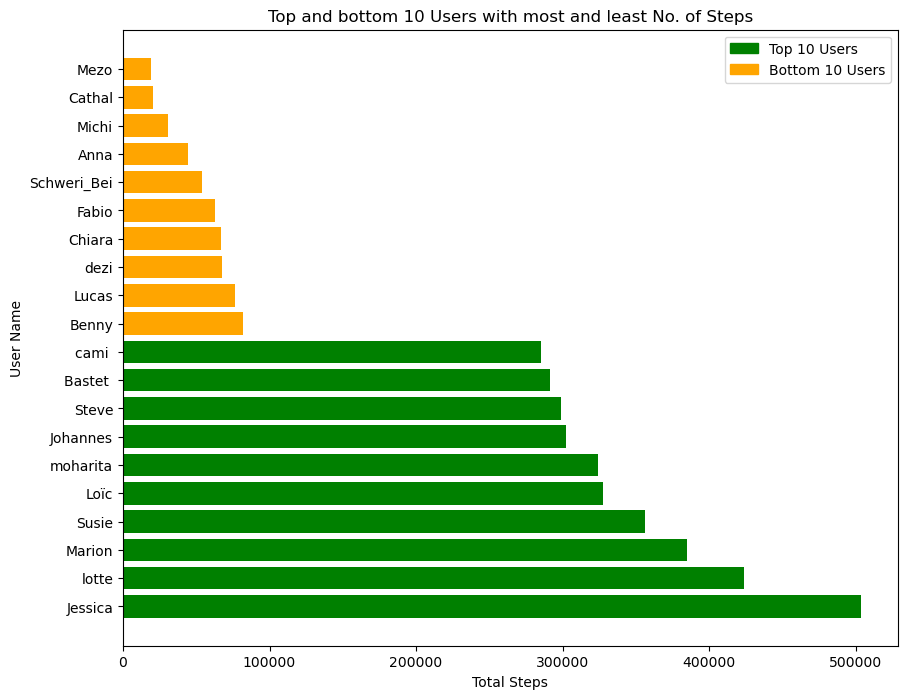

In [85]:
top_10 = df_top_bottom.head(10) 
bottom_10 = df_top_bottom.tail(10) # we make sure that

plt.figure(figsize=(10, 8))

# Create a list of colors for top and bottom usesr bar
colors = ['green' if user in top_10['user_name'].values else 'orange' for user in df_top_bottom['user_name']]

# Matplotlib horizontal bar plot with colored bars and dashed line
plt.barh(df_top_bottom['user_name'], df_top_bottom['total_steps'], color=colors)

# Set plot labels and title
plt.xlabel('Total Steps')
plt.ylabel('User Name')
plt.title('Top and bottom 10 Users with most and least No. of Steps')

# Add a legend with separate handles for top and bottom
legend_handles = [mpatches.Patch(color='green', label='Top 10 Users'),
                  mpatches.Patch(color='orange', label='Bottom 10 Users')]

plt.legend(handles=legend_handles, loc='upper right')

# Show the plot
plt.show()